In [241]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import VotingClassifier


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
train = pd.read_csv('../data/train - train.csv')
test_data = pd.read_csv('../data/test - test.csv')
X = train

# split data into (train, val, test) and then EDA on train
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)
X_train, X_val  = train_test_split(X_train, test_size=0.12, random_state=42)

remove_feat = ['fc', 'px_height', 'sc_w']
X_train.drop(columns= remove_feat, inplace=True)

# EDA

In [154]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
417,651,1,0.8,1,1.0,63.0,0.2,176.0,5.0,4.0,858.0,2244.0,14.0,19,1,1,0,1
443,1448,0,1.4,1,0.0,26.0,1.0,156.0,3.0,16.0,1850.0,1175.0,12.0,6,0,1,0,1
1329,1384,1,2.8,1,0.0,60.0,0.1,82.0,3.0,18.0,1210.0,1221.0,18.0,15,1,0,1,1
764,1849,1,2.3,0,1.0,15.0,0.4,144.0,5.0,19.0,1123.0,3447.0,14.0,19,1,0,1,3
1187,1300,1,0.5,0,0.0,62.0,0.1,156.0,6.0,7.0,1037.0,874.0,15.0,10,1,1,0,0


### Check if train data is balanced

In [155]:
print('X_train len: ', len(X_train))
X_train['price_range'].value_counts() # -> train data is balanced 

X_train len:  1584


price_range
2    398
3    397
1    395
0    394
Name: count, dtype: int64

### Data Description

In [156]:
X_train.describe()
# insights (some)
# From the description there are few null values -> dealing with missing values is required
# Some features like battery_power, px_height, px_width have high std and wide range of values -> normalization required (even though not all algorithms require feature scaling but it's a common practice to normalize anyway)
# three_g has mean value of 0.77 indicating that about three-quarters of the phones support 3G

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
count,1584.000000,1584.000000,1584.000000,1584.000000,1579.000000,1579.000000,1579.000000,1580.000000,1580.000000,1579.000000,1583.000000,1583.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1247.412247,0.489899,1.518371,0.508207,0.526282,31.662445,0.500760,140.531646,4.536076,9.969601,1250.717625,2123.095389,12.264520,11.005051,0.770202,0.508207,0.503788,1.503788
std,442.636860,0.500056,0.825155,0.500091,0.499467,18.111874,0.288015,35.347201,2.282037,6.041079,434.447839,1085.480142,4.258852,5.506440,0.420836,0.500091,0.500144,1.117816
min,501.000000,0.000000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,500.000000,256.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.600000,0.000000,0.000000,16.000000,0.200000,109.750000,3.000000,5.000000,874.000000,1205.500000,9.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1238.000000,0.000000,1.500000,1.000000,1.000000,31.000000,0.500000,141.000000,4.000000,10.000000,1244.000000,2146.000000,12.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1627.250000,1.000000,2.300000,1.000000,1.000000,47.000000,0.800000,171.000000,7.000000,15.000000,1634.000000,3067.000000,16.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1998.000000,3996.000000,19.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Normalize Data

In [256]:
# normalize all continuous values
def normalize(df):
    feat = ['battery_power','clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
    feat = [f for f in feat if f not in remove_feat]
    scaler = StandardScaler()
    df[feat] = scaler.fit_transform(df[feat])
    return df
    
X_train = normalize(X_train)

### Charts

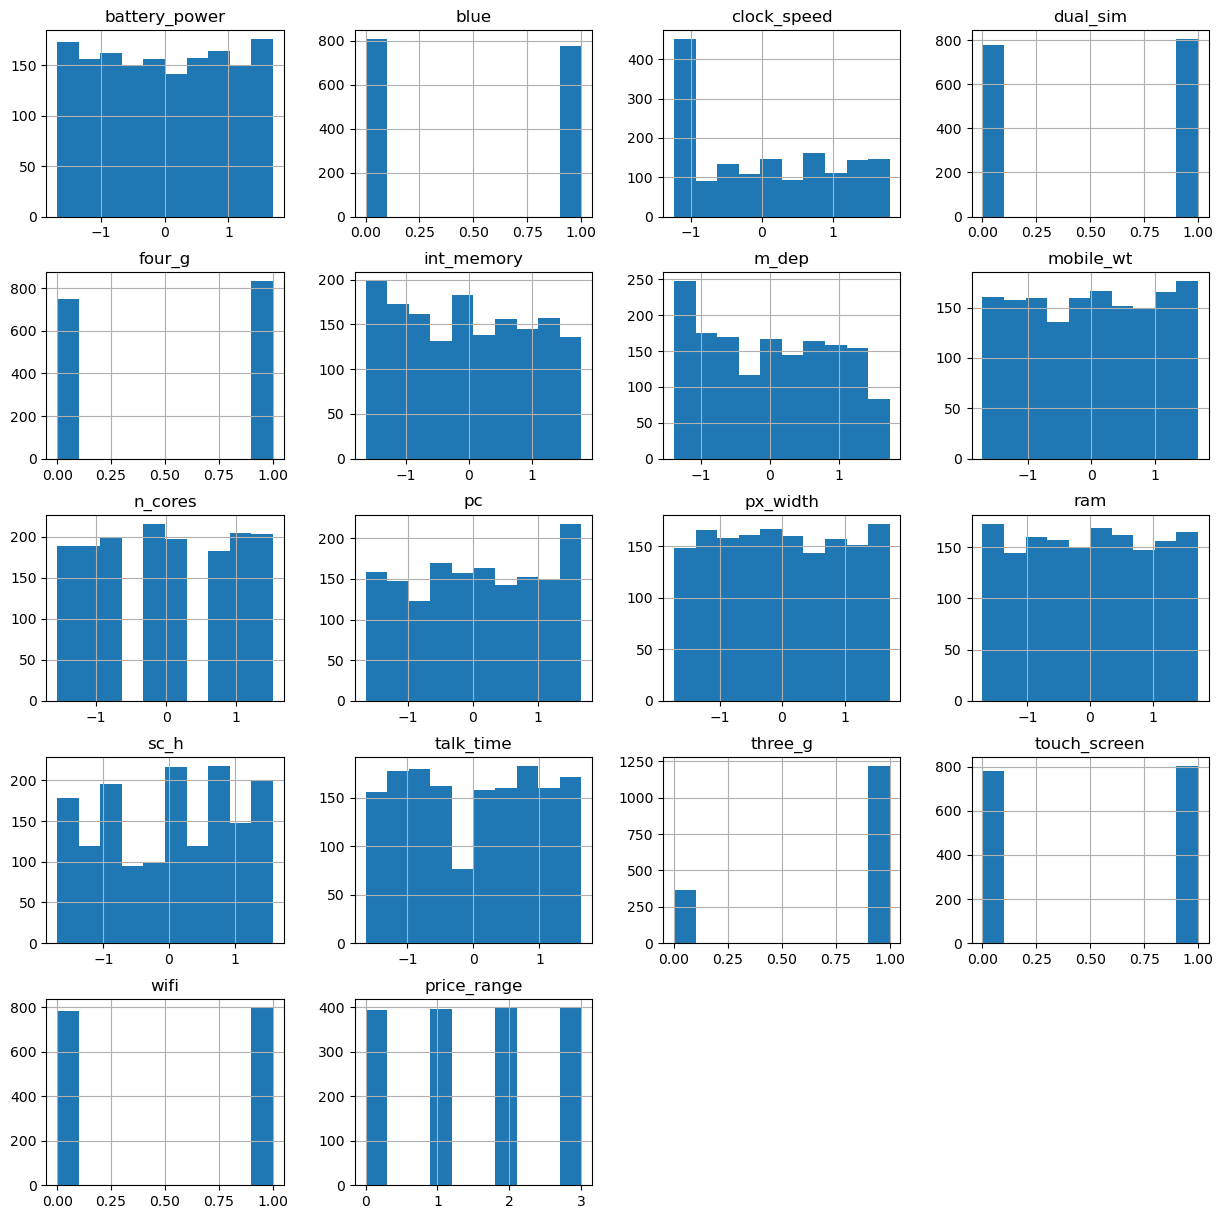

In [158]:
X_train.hist(figsize=(15, 15))
plt.show()

# few features like fc are skewed and most are almost uniformly

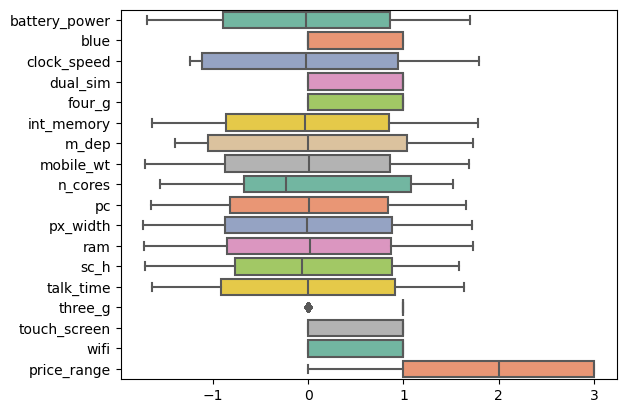

In [159]:
sns.boxplot(data=X_train, orient='h', palette='Set2')
plt.show()

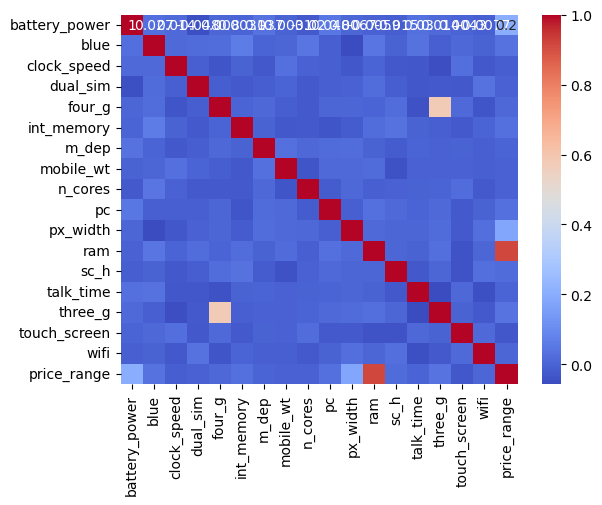

In [160]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Insights (some)

# It looks higher ram range leads to higer price_range (strong correclation)
# fc is skewed and have strong outliers, pc could be a good replacement for it (strong correlation with fc) which could mean removing fc feature won't be a problem
# same px_height compared to px_width
# four_g correlated with three_g 

# will first train with skewed data and measure the performance and then adjust and feature engineer based on that

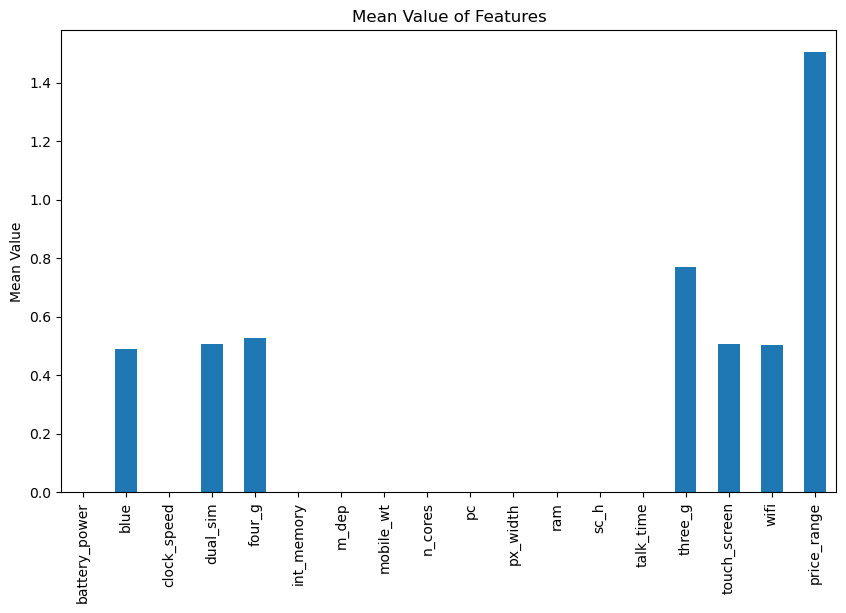

In [161]:
X_train.mean().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Mean Value')
plt.title('Mean Value of Features')
plt.show()

### Missing Values

In [257]:
def fill_missing_values(df):
    feat_mean = ['battery_power','clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
    feat_mode = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
    feat_mean = [f for f in feat_mean if f not in remove_feat]
    feat_mode = [f for f in feat_mode if f not in remove_feat]
    # filling missing values based on X_train (in production time, could be on the entire dataset instead of X_train, but not a big deal anyway)
    means = X_train[feat_mean].mean().to_dict()
    modes = X_train[feat_mode].mode().iloc[0].to_dict()
    
    df.fillna(means, inplace=True)
    df.fillna(modes, inplace=True)
    return df

X_train = fill_missing_values(X_train)

In [163]:
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
count,1.584000e+03,1584.000000,1.584000e+03,1584.000000,1584.000000,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1.584000e+03,1584.000000,1584.000000,1584.000000,1584.000000
mean,-2.242875e-16,0.489899,-1.861586e-16,0.508207,0.527778,-5.943618e-17,-4.485750e-17,1.682156e-17,8.971499e-17,1.121437e-16,3.252168e-17,1.642906e-16,-9.924721e-17,-2.691450e-17,0.770202,0.508207,0.503788,1.503788
std,1.000316e+00,0.500056,1.000316e+00,0.500091,0.499385,9.987358e-01,9.987358e-01,9.990520e-01,9.990520e-01,9.987358e-01,1.000000e+00,1.000000e+00,1.000316e+00,1.000316e+00,0.420836,0.500091,0.500144,1.117816
min,-1.686818e+00,0.000000,-1.234547e+00,0.000000,0.000000,-1.638254e+00,-1.391897e+00,-1.713030e+00,-1.550017e+00,-1.650824e+00,-1.728527e+00,-1.720608e+00,-1.706285e+00,-1.635883e+00,0.000000,0.000000,0.000000,0.000000
25%,-8.935928e-01,0.000000,-1.113319e+00,0.000000,0.000000,-8.650351e-01,-1.044583e+00,-8.640377e-01,-6.733294e-01,-8.228952e-01,-8.673922e-01,-8.453727e-01,-7.667680e-01,-9.092319e-01,1.000000,0.000000,0.000000,1.000000
50%,-2.127075e-02,0.000000,-2.227097e-02,1.000000,1.000000,-3.658674e-02,-2.639501e-03,1.325431e-02,-1.174928e-01,5.033640e-03,-1.546733e-02,2.018603e-02,-6.213030e-02,-9.174893e-04,1.000000,1.000000,1.000000,2.000000
75%,8.583960e-01,1.000000,9.475495e-01,1.000000,1.000000,8.470915e-01,7.788178e-01,8.622465e-01,1.080046e+00,8.329625e-01,8.825075e-01,8.693874e-01,8.773866e-01,9.073969e-01,1.000000,1.000000,1.000000,3.000000
max,1.696255e+00,1.000000,1.796142e+00,1.000000,1.000000,1.786000e+00,1.733932e+00,1.682939e+00,1.518390e+00,1.660891e+00,1.720617e+00,1.725961e+00,1.582024e+00,1.634048e+00,1.000000,1.000000,1.000000,3.000000


# Model Training

### Model Training Insights To Improve Model Performance

* Since the data is structured + features contains some skewed data + classification problem -> Random forest would be a good model to start with -> found that random forest with 150 estimators has the best score of mean/variance trandoff
* By removing ONLY the ram feature from the dataset the performance of the model drops significantly from ~0.85 to ~0.2 (which was expected from the correlation shown in the heatmap)

* From the confusion matrix [[73.2  5.6  0.   0. ]
 [ 7.8 65.2  6.   0. ]
 [ 0.  10.2 61.6  7.8]
 [ 0.   0.   8.2 71.2]]
 Model seems to have problem with adjacent classes: (ex. model predict 1 when it's actually 0 or 2, model predicts 2 when it's actually 1 or 3)
* ensemble different models to increase the score (training isn't heavy as the dataset is small) -> increased score by 3%
* since the training is done on 5 different folds the resulted score is more robust

In [270]:
def prepare_data(data):
    data = normalize(data)
    data = fill_missing_values(data)
    return data

In [271]:
from joblib import dump
def save_model(model, fold):
     dump(model, 'models/'+ f"model_{fold}.joblib")

In [272]:
def train(model, X, Y, kf):
    conf_scores = []
    acc_scores = []
    for fold, (train_index, test_index) in enumerate(kf.split(X, Y), 0):
        all_preds = []
        # Note: x_train not X_train
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        #confusion matrix
        conf_scores.append(confusion_matrix(y_test, y_pred))
        #accuracy
        acc_scores.append(accuracy_score(y_test, y_pred))
        #save_model 
        save_model(model, fold)
    return conf_scores, acc_scores

In [273]:
def eval(model, x_test, y_test):
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    conf_score = confusion_matrix(y_test, y_pred)
    conf_score, acc_score 

#### Pipeline

In [275]:
# data
X_train = prepare_data(X_train)
X = X_train.drop(columns=['price_range']).reset_index(drop=True)
Y = X_train['price_range'].reset_index(drop=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# models
rf = RandomForestClassifier(n_estimators=150, random_state=42)
xgb = XGBClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
log = LogisticRegression(random_state=42)
ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('svm', svm), ('log', log)], voting='hard')

# train
conf_scores, acc_scores = train(ensemble, X, Y, kf)

In [276]:
scores_mean = np.mean(conf_scores, axis=0)
scores_std = np.std(conf_scores, axis=0)
scores_acc = np.mean(acc_scores)

print(scores_mean)
print()
print(scores_std)
print()
print('accuracy: ', scores_acc)

[[74.4  4.4  0.   0. ]
 [ 6.6 68.6  3.8  0. ]
 [ 0.   8.4 67.2  4. ]
 [ 0.   0.   9.  70.4]]

[[4.40908154 2.93938769 0.         0.        ]
 [1.8547237  8.26075057 1.16619038 0.        ]
 [0.         2.57681975 5.23067873 1.8973666 ]
 [0.         0.         2.68328157 4.31740663]]

accuracy:  0.8857205606357066


In [254]:
x_test = X_val.drop(columns=['price_range'])
y_test = X_val['price_range']
conf_score, acc_score = eval(ensemble, x_test, y_test)
conf_score, acc_score

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fc
- px_height
- sc_w


In [ ]:
# the below results related to first model performance
# Scores 
# 100 estimators [0.861198738170347, 0.889589905362776, 0.8769716088328076, 0.889589905362776, 0.8734177215189873]
# 150 estimators [0.8548895899053628, 0.8801261829652997, 0.8832807570977917, 0.8958990536277602, 0.8892405063291139]
# 200 estimators [0.8517350157728707, 0.8832807570977917, 0.9022082018927445, 0.8990536277602523, 0.8955696202531646]

# mean, variance
# 100 (0.8781535758495389, 0.00011457422969345377)
# 150 (0.8806872179850656, 0.00019542350101562045)
# 200 (0.8863694445553648, 0.0003410963235476323) 
# Comment: seems 150 estimators is the best choice (model is sensitive to a specific fold)

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_0.joblib'